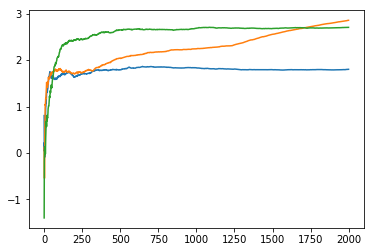

In [15]:
import random
from random import gauss
from statistics import mean 
import matplotlib
import matplotlib.pyplot as plt

def run(epsilon, machines, nb_machines):
    gains = []
    avg_gains = []
    gain = 0
    machine_gains = [[] for i in range(nb_machines)] 
    avg_machine_gain = [0] * nb_machines
    pick = 0
    best_machine = random.randint(0, nb_machines)
    
    for i in range(nb_machines):
        rd = random.random()
        if rd < epsilon:
            # Explore
            pick = random.randint(0, nb_machines)
        else:
            pick = best_machine
        gain = gauss(machines[pick], 1)
        gains.append(gain)
        machine_gains[pick].append(gain)
        avg_machine_gain[pick] = mean(machine_gains[pick])
        best_machine = avg_machine_gain.index(max(avg_machine_gain))
        avg_gains.append(mean(gains))
        
    return gains, avg_gains


if __name__ == '__main__':
    nb_machines = 2000
    machines = [gauss(1, 1) for i in range(nb_machines)]
    gains, avg = run(0, machines, nb_machines)
    gains_2, avg_2 = run(0.01, machines, nb_machines)
    gains_3, avg_3 = run(0.1, machines, nb_machines)


    plt.plot(range(nb_machines), avg)
    plt.plot(range(nb_machines), avg_2)
    plt.plot(range(nb_machines), avg_3)
    plt.show()
